# Code for visualisations in report

##  1. Install packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Visualisations

### Section 1: Macro perspective of luxury goods during Covid for the USA

#### 2.1.1 Create luxury good dataframe and clean data for graph

In [2]:
df_luxgoods_US = pd.read_csv('/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/lux_goods_US_revenue.csv', skiprows=1)
df_luxgoods_US.head()

,Region,Market,Chart,Name,Unit,Source,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,United States,Luxury Leather Goods,Revenue,Total,USD (US$),Statista Market Insights,"11,060,532,359.955","12,130,107,426.044","10,146,228,676.659","11,754,440,260.56","12,558,846,898.03","14,828,605,751.052","16,186,759,446.429","17,863,829,316.985","19,524,128,488.837","21,167,824,668.969","22,795,083,887.3","24,406,070,513.448"
1,United States,Luxury Leather Goods,Revenue Change,Total,percent,Statista Market Insights,0,0.097,-0.164,0.159,0.068,0.181,0.092,0.104,0.093,0.084,0.077,0.071
2,United States,Luxury Leather Goods,Average Revenue per Capita,Total,USD (US$),Statista Market Insights,33.301,36.283,30.202,34.88,37.125,43.614,47.355,51.99,56.532,60.985,65.352,69.633
3,United States,Luxury Leather Goods,Company Shares,LVMH,percent,Statista Market Insights,0,0,0,0,0,0.418,0,0,0,0,0,0
4,United States,Luxury Leather Goods,Company Shares,Tapestry,percent,Statista Market Insights,0,0,0,0,0,0.12,0,0,0,0,0,0


In [3]:
df_luxcosfrag_US_full = pd.read_csv('/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/US_cos_frag_skin.csv')
df_luxcosfrag_US = df_luxcosfrag_US_full.iloc[1:4]
df_luxcosfrag_US = df_luxcosfrag_US.rename(columns={'Unnamed: 0' : 'Market'})
df_luxcosfrag_US = df_luxcosfrag_US.drop(columns=['2018', '2022', '2023', '2024', '2025','2026','2027','2028','2029'])
df_luxcosfrag_US[['2019','2020','2021']] = df_luxcosfrag_US[['2019','2020','2021']]*1000000000
df_luxcosfrag_US

,Market,2019,2020,2021
1,Prestige Skin Care,3.620000e+09,3.110000e+09,3.330000e+09
2,Prestige Fragrances,3.570000e+09,2.900000e+09,3.140000e+09
3,Prestige Cosmetics,3.940000e+09,3.450000e+09,3.730000e+09


In [4]:
df_luxgoods_US_filtered = df_luxgoods_US[df_luxgoods_US["Chart"] == "Revenue"]
df_luxgoods_US_filtered = df_luxgoods_US_filtered[df_luxgoods_US_filtered["Name"]=="Total"]
df_luxgoods_US_filtered = df_luxgoods_US_filtered.drop(columns=['Region', 'Chart', 'Name', 'Unit', 'Source', '2018', '2022', '2023', '2024', '2025','2026','2027','2028','2029'])
df_luxgoods_US_filtered

,Market,2019,2020,2021
0,Luxury Leather Goods,"12,130,107,426.044","10,146,228,676.659","11,754,440,260.56"
171,Luxury Watches & Jewelry,"17,786,008,870.76","14,661,407,923.848","16,442,476,032.358"
345,Luxury Fashion,"30,993,996,120.716","27,713,460,330.501","28,734,741,926.935"
518,Luxury Eyewear,"9,600,588,003.752","7,928,284,844.069","8,449,274,267.786"
679,Prestige Cosmetics & Fragrances,"11,128,087,085.608","9,460,812,647.317","10,198,173,508.067"


In [5]:
merged_market_df = pd.concat([df_luxcosfrag_US, df_luxgoods_US_filtered], ignore_index=True)
merged_market_df = merged_market_df.drop(7)
merged_market_df.head()

,Market,2019,2020,2021
0,Prestige Skin Care,3620000000.0,3110000000.0,3330000000.0
1,Prestige Fragrances,3570000000.0,2900000000.0,3140000000.0
2,Prestige Cosmetics,3940000000.0,3450000000.0,3730000000.0
3,Luxury Leather Goods,"12,130,107,426.044","10,146,228,676.659","11,754,440,260.56"
4,Luxury Watches & Jewelry,"17,786,008,870.76","14,661,407,923.848","16,442,476,032.358"


#### 2.1.2 Code visualisation for luxury goods before, during and after covid-19 

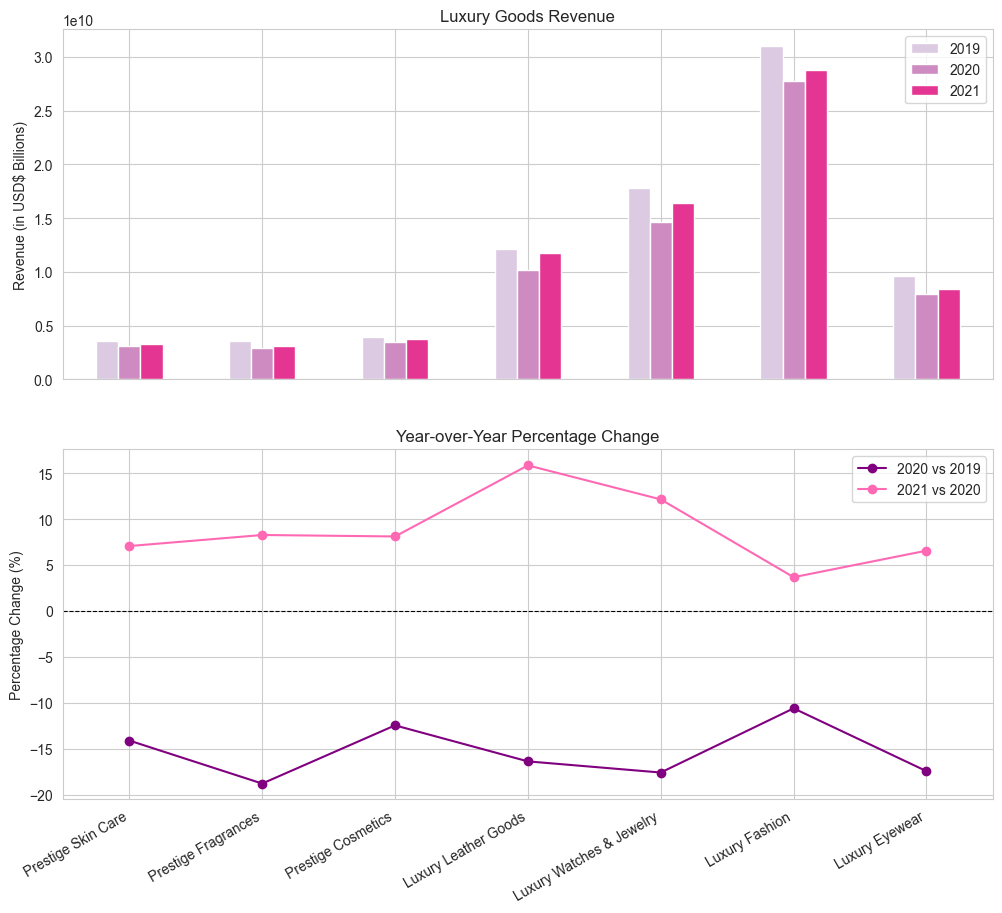

In [6]:
colors = sns.color_palette("PuRd", n_colors=4)
sns.set_palette(colors)

sns.set_style("whitegrid")

for year in ['2019', '2020', '2021']:
    merged_market_df[year] = merged_market_df[year].replace({',': ''}, regex=True).astype(float)

merged_market_df['Change 2020-2019'] = (merged_market_df['2020'] - merged_market_df['2019']) / merged_market_df['2019'] * 100
merged_market_df['Change 2021-2020'] = (merged_market_df['2021'] - merged_market_df['2020']) / merged_market_df['2020'] * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

merged_market_df.set_index('Market')[['2019', '2020', '2021']].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Revenue (in USD$ Billions)')
ax1.set_title('Luxury Goods Revenue')

ax2.plot(merged_market_df['Market'], merged_market_df['Change 2020-2019'], label='2020 vs 2019', marker='o', color='purple')
ax2.plot(merged_market_df['Market'], merged_market_df['Change 2021-2020'], label='2021 vs 2020', marker='o', color='hotpink')
ax2.set_ylabel('Percentage Change (%)')
ax2.set_title('Year-over-Year Percentage Change')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax2.legend()

plt.xticks(rotation=30, ha='right')
plt.show()

### Section 2: Cosmetics and the lipstick index during covid in the USA

#### 2.2.1 Create luxury cosmetic dataframe separated by category and clean

In [7]:
df_luxcos_segments = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/segmented_luxcos_revenue.csv")
df_luxcos_segments_filtered = df_luxcos_segments[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]
df_luxcos_segments_filtered = df_luxcos_segments_filtered.iloc[1:4]
df_luxcos_segments_filtered = df_luxcos_segments_filtered.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
df_luxcos_segments_filtered

,Cosmetic_product,2018,2019,2020,2021,2022,2023,2024
1,Prestige Eyes Cosmetics,0.81,0.82,1.01,0.96,0.83,0.84,0.89
2,Prestige Face Cosmetics,2.06,2.18,1.86,2.10,2.38,2.42,2.54
3,Prestige Lips Cosmetics,0.89,0.94,0.59,0.67,0.96,0.97,1.02


In [8]:
df_luxcos_segments_filtered.set_index('Cosmetic_product', inplace=True)
df_luxcos_segments_filtered

,2018,2019,2020,2021,2022,2023,2024
Cosmetic_product,,,,,,,
Prestige Eyes Cosmetics,0.81,0.82,1.01,0.96,0.83,0.84,0.89
Prestige Face Cosmetics,2.06,2.18,1.86,2.10,2.38,2.42,2.54
Prestige Lips Cosmetics,0.89,0.94,0.59,0.67,0.96,0.97,1.02


#### 2.2.2 Create line graph for prestige eyes, lips and face over time

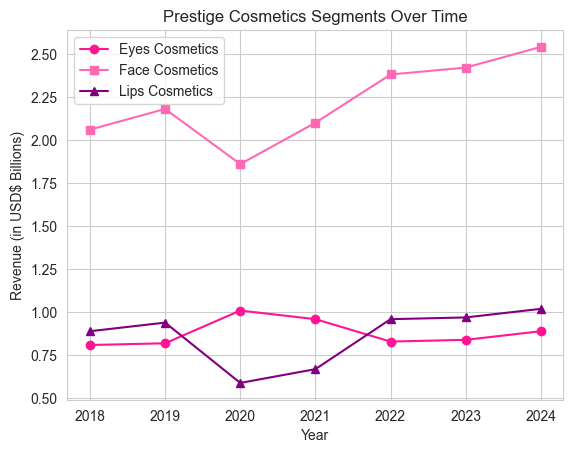

In [9]:
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Eyes Cosmetics'], label='Eyes Cosmetics', color='deeppink', marker='o')
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Face Cosmetics'], label='Face Cosmetics', color='hotpink', marker='s')
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Lips Cosmetics'], label='Lips Cosmetics', color='purple', marker='^')
plt.legend()
plt.title('Prestige Cosmetics Segments Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (in USD$ Billions)')
plt.grid(True)
plt.show()

#### 2.2.3 Dataframe and clean for prestige cosmetics and overall US cosmetics

In [10]:
df_luxcosfrag_US_full
df_prestige_cosmetics = df_luxcosfrag_US_full[df_luxcosfrag_US_full["Unnamed: 0"] == "Prestige Cosmetics"]
df_prestige_cosmetics = df_prestige_cosmetics.drop(columns=['Unnamed: 0'])

dft_prestige_cosmetics = df_prestige_cosmetics.transpose()

dft_prestige_cosmetics.reset_index(inplace=True)

dft_prestige_cosmetics.columns = ['Year', 'Prestige Cosmetics Revenue']

dft_prestige_cosmetics.head()

,Year,Prestige Cosmetics Revenue
0,2018,3.76
1,2019,3.94
2,2020,3.45
3,2021,3.73
4,2022,4.16


In [11]:
df_cosmetics_market = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/cosmetic_revenue_US.csv")
df_cosmetics_market.head()

,Revenue of the cosmetics industry in the U.S. 2019-2030,Unnamed: 1
0,Revenue of the cosmetics market in the United ...,NaN
1,NaN,NaN
2,2019,17.03
3,2020,13.64
4,2021,14.77


In [12]:
df_cosmetics_market = df_cosmetics_market.rename(columns={'Unnamed: 1' : 'Revenue mass market', 'Revenue of the cosmetics industry in the U.S. 2019-2030' : 'Year'})
df_cosmetics_market = df_cosmetics_market.iloc[2:]
df_cosmetics_market.head()

,Year,Revenue mass market
2,2019,17.03
3,2020,13.64
4,2021,14.77
5,2022,18.01
6,2023,19.43


In [13]:
merged_cos_df = pd.merge(df_cosmetics_market, dft_prestige_cosmetics, on="Year", how="inner")
merged_cos_df["Year"] = merged_cos_df["Year"].astype(int)
merged_cos_df = merged_cos_df[merged_cos_df["Year"] < 2024]
merged_cos_df.head()

,Year,Revenue mass market,Prestige Cosmetics Revenue
0,2019,17.03,3.94
1,2020,13.64,3.45
2,2021,14.77,3.73
3,2022,18.01,4.16
4,2023,19.43,4.24


#### 2.2.4 Indexed graph for prestige cosmetics and cosmetics market overall

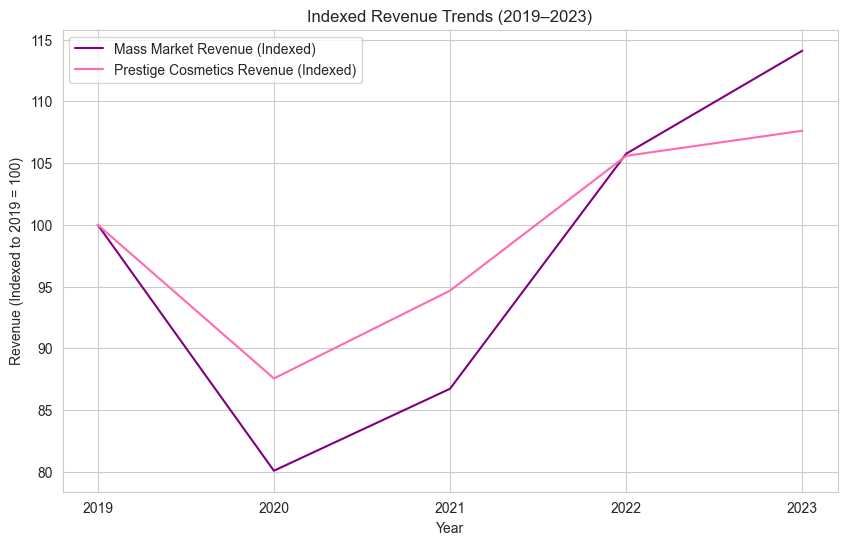

In [14]:
df_indexed = merged_cos_df.copy()
df_indexed['Revenue mass market'] = merged_cos_df['Revenue mass market'] / merged_cos_df['Revenue mass market'].iloc[0] * 100
df_indexed['Prestige Cosmetics Revenue'] = merged_cos_df['Prestige Cosmetics Revenue'] / merged_cos_df['Prestige Cosmetics Revenue'].iloc[0] * 100

plt.figure(figsize=(10, 6))
plt.plot(merged_cos_df['Year'], df_indexed['Revenue mass market'], label='Mass Market Revenue (Indexed)', color="purple")
plt.plot(merged_cos_df['Year'], df_indexed['Prestige Cosmetics Revenue'], label='Prestige Cosmetics Revenue (Indexed)', color="hotpink")
plt.xticks(merged_cos_df["Year"])
plt.xlabel('Year')
plt.ylabel('Revenue (Indexed to 2019 = 100)')
plt.title('Indexed Revenue Trends (2019–2023)')
plt.legend()
plt.grid(True)
plt.show()
